In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Preprocess the data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Encode categorical variables
categorical_columns = ['Sex', 'Embarked']

In [ ]:
# Use OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_columns = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
print(encoded_df)

     Sex_male  Embarked_Q  Embarked_S
0         1.0         0.0         1.0
1         0.0         0.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         1.0         0.0         1.0
..        ...         ...         ...
886       1.0         0.0         1.0
887       0.0         0.0         1.0
888       0.0         0.0         1.0
889       1.0         0.0         0.0
890       1.0         1.0         0.0

[891 rows x 3 columns]


In [ ]:
# Concatenate the encoded columns with the original dataframe
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
print(df_encoded)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0              1         0       3  22.0      1      0   7.2500       1.0   
1              2         1       1  38.0      1      0  71.2833       0.0   
2              3         1       3  26.0      0      0   7.9250       0.0   
3              4         1       1  35.0      1      0  53.1000       0.0   
4              5         0       3  35.0      0      0   8.0500       1.0   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0      0      0  13.0000       1.0   
887          888         1       1  19.0      0      0  30.0000       0.0   
888          889         0       3  28.0      1      2  23.4500       0.0   
889          890         1       1  26.0      0      0  30.0000       1.0   
890          891         0       3  32.0      0      0   7.7500       1.0   

     Embarked_Q  Embarked_S  
0           0.0         1.0  
1           0.0

In [ ]:
# Define features and target
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (623, 9)
X_test shape: (268, 9)
y_train shape: (623,)
y_test shape: (268,)


In [ ]:
# Define the logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train, y_train)
# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model accuracy: {score}")

Model accuracy: 0.8059701492537313


Scale the Features: Standardize the features using StandardScaler to ensure all features have the same scale, which is important for SVM.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SVC**

In [ ]:
# Define the SVC model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train_scaled, y_train)

# Evaluate the model
score = svm.score(X_test_scaled, y_test)

print(f"SVC Model accuracy: {score}")

SVC Model accuracy: 0.8134328358208955


**Random Forest Classifier**

In [ ]:
# Train and evaluate the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(f"Random Forest Model accuracy: {score}")

Random Forest Model accuracy: 0.8246268656716418


**KFOLD**

In [ ]:
from sklearn.model_selection import KFold

# Initialize KFold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

kf

KFold(n_splits=3, random_state=42, shuffle=True)

In [ ]:
# List to store accuracy scores for each fold
accuracy_scores = []

In [ ]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    rf.fit(X_train_scaled, y_train)

    # Evaluate the model
    score = rf.score(X_test_scaled, y_test)
    accuracy_scores.append(score)

In [ ]:
print( accuracy_scores)

[0.8181818181818182, 0.8215488215488216, 0.8316498316498316]


In [ ]:
# Calculate and print the average accuracy score
average_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy from 3-fold cross-validation: {average_accuracy}")

Average accuracy from 3-fold cross-validation: 0.8237934904601572


______________________________________________________

Hyperparameter Tuning


In [ ]:
# Define the model pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
ada = AdaBoostClassifier(random_state=2024)
ada.fit(X_train_scaled,y_train)
y_pred_ada = ada.predict(X_test_scaled)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       187
           1       0.68      0.74      0.71       110

    accuracy                           0.77       297
   macro avg       0.76      0.77      0.76       297
weighted avg       0.78      0.77      0.78       297



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.61344538 0.8487395  0.87394958 0.78151261 0.78813559]
Average cross-validation score: 0.7811565304087738


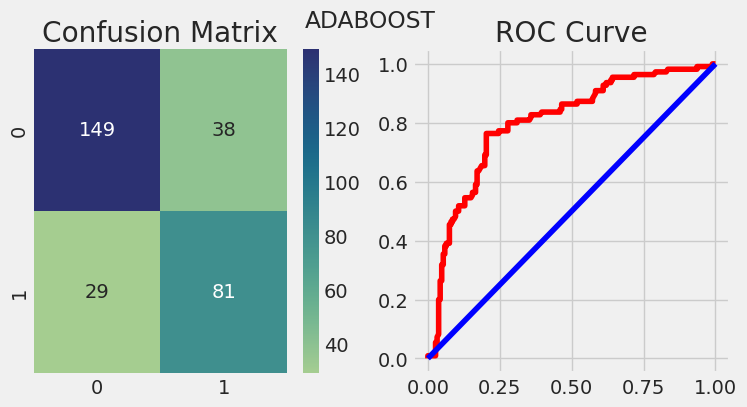

In [ ]:
# Plotting Confusion Matrix and ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('ADABOOST')

conf = confusion_matrix(y_test,y_pred_ada)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = ada.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()

### **K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       187
           1       0.77      0.64      0.70       110

    accuracy                           0.79       297
   macro avg       0.79      0.76      0.77       297
weighted avg       0.79      0.79      0.79       297



In [ ]:
scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.80672269 0.84033613 0.83193277 0.77310924 0.81355932]
Average cross-validation score: 0.8131320324740067


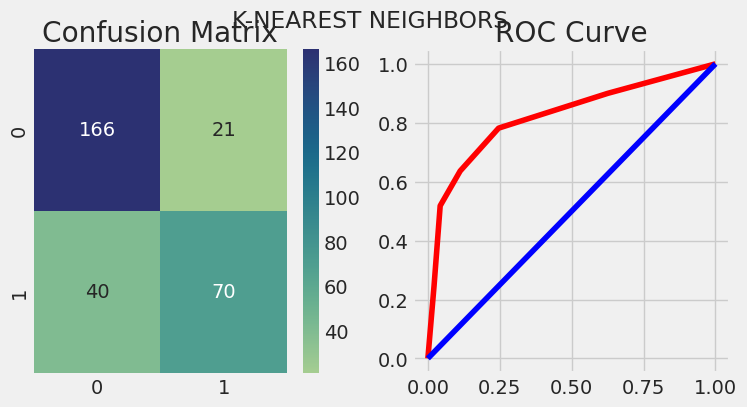

In [ ]:
# Plotting Confusion Matrix and ROC Curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('K-NEAREST NEIGHBORS')

conf = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = knn.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()